<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/2_23_%5BData_Analyze%5D_%EC%BD%94%EB%A1%9C%EB%82%98%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 가져오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 지도 시각화 때 사용할 라이브러리
import folium

# 데이터 불러오기

In [2]:
covid_filepath = "/content/drive/MyDrive/ICTCOG 인공지능과정/Data/covid_19_clean_complete.csv"

corona = pd.read_csv(covid_filepath)
corona.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# 데이터 확인 하기

## 결측값 확인하기

In [3]:
corona.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

## 정보 확인하기

In [4]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


## 데이터 타입 수정하기
* 문자열로 되어 있는 `Date`를 날짜 자료형 `Datetime`으로 바꾸기

In [5]:
corona['Date'] = pd.to_datetime(corona['Date'])
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


# 코로나 바이러스의 국가별 최신 확진자, 사망자, 회복자 데이터 분석

## 최근 데이터만 남기기

In [38]:
corona_lt = corona[corona['Date'] == max(corona['Date'])]
corona_lt.head()

# 내가 생각하는 더 정확한 방법
# Date의 Max만 가져오게 되면, 특정 국가의 max('Date')인 값이 존재하지 않을 수 있다.
# 따라서 각 나라별로 최신의 Date를 가지고 오려면 나라별 Date의 최대값부터 구해야 한다.
# a = corona.sort_values('Date', ascending = False)
# a.drop_duplicates('Country/Region',keep = 'first')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


## 국가별 합계 구하기

In [40]:
corona_lt_country_sum = corona_lt.groupby("Country/Region")["Confirmed", "Deaths", "Recovered"].sum() # 합계를 구하는건 여기서는 별 의미가 없음...
corona_lt_country_sum.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,36263,1269,25198
Albania,4880,144,2745
Algeria,27973,1163,18837
Andorra,907,52,803
Angola,950,41,242


In [41]:
corona_lt_country_sum = corona_lt_country_sum.reset_index()
corona_lt_country_sum

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
182,West Bank and Gaza,10621,78,3752
183,Western Sahara,10,1,8
184,Yemen,1691,483,833
185,Zambia,4552,140,2815


## 사망자가 많은 순으로 정렬

In [9]:
corona_deaths_sorted = corona_lt_country_sum.sort_values(by="Confirmed", ascending=False)
corona_deaths_sorted

,Country/Region,Confirmed,Deaths,Recovered
173,US,4290259,148011,1325804
23,Brazil,2442375,87618,1846641
79,India,1480073,33408,951166
138,Russia,816680,13334,602249
154,South Africa,452529,7067,274925
...,...,...,...,...
49,Dominica,18,0,18
140,Saint Kitts and Nevis,17,0,15
68,Greenland,14,0,13
75,Holy See,12,0,12


### 데이터 프레임상에서 모든 데이터를 보여줌과 동시에 히트맵 처럼 표시 - 잔기술

In [10]:
corona_deaths_sorted.style.background_gradient(cmap='Reds')

,Country/Region,Confirmed,Deaths,Recovered
173,US,4290259,148011,1325804
23,Brazil,2442375,87618,1846641
79,India,1480073,33408,951166
138,Russia,816680,13334,602249
154,South Africa,452529,7067,274925
111,Mexico,395489,44022,303810
132,Peru,389717,18418,272547
35,Chile,347923,9187,319954
177,United Kingdom,301708,45844,1437
81,Iran,293606,15912,255144


# 시간에 따른 확진자, 사망자, 회복자 시각화

## 날짜별 확진자, 사망자, 회복자 합계 구하기

In [11]:
corona_date = corona.groupby("Date")["Confirmed", "Deaths", "Recovered"].sum()
corona_date.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


Date가 순서대로 안되어있을 가능성도 있으니까 인덱스를 재정렬

In [12]:
corona_date = corona_date.sort_index()
corona_date.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


## 시간에 따른 누적 확진자, 사망자, 회복자 그래프 그리기

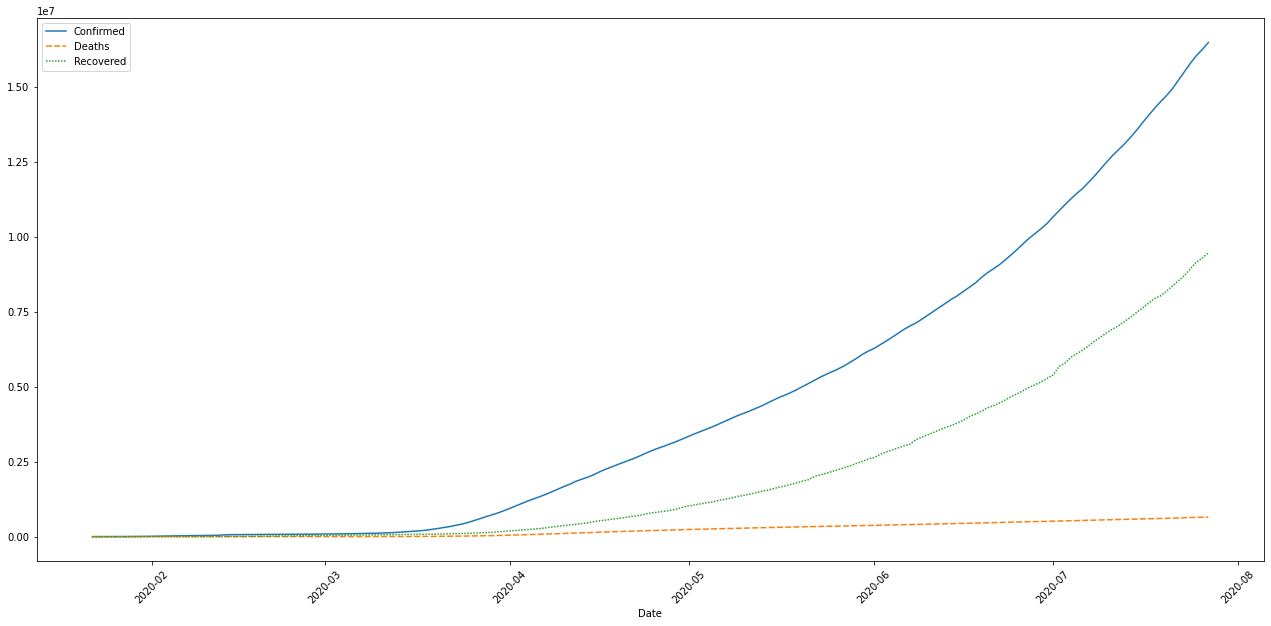

In [13]:
plt.figure(figsize=(22, 10))
plt.xticks(rotation=45)
sns.lineplot(data=corona_date)
plt.show()

# 전세계 코로나 바이러스 감염 지도

## folium 사용방법 이해

In [14]:
import folium

map = folium.Map()
map

## folium으로 서울 표시하기

In [15]:
map = folium.Map(location=[37.5642135, 127.0016985])
map

### 확대하기

In [16]:
map = folium.Map(location=[37.5642135, 127.0016985], zoom_start=12)
map

## CircleMarker 그리기

In [42]:
map = folium.Map(location=[37.5642135, 127.0016985], zoom_start=16)

# 서울 시청 좌표
seoul_cityhall_coord = [37.565577, 126.978082]

folium.CircleMarker(seoul_cityhall_coord, radius=100).add_to(map) # 원을 그려서 맵에 추가하겠다.

map

### CircleMarker 색상, 채우기, 원 내부 색상 설정

In [18]:
seoul_cityhall_coord = [37.565577, 126.978082]
map = folium.Map(location=seoul_cityhall_coord, zoom_start=16)

folium.CircleMarker(seoul_cityhall_coord, radius=100, color="#F7D358", fill=True, fill_color="#08088A").add_to(map) # 원을 그려서 맵에 추가하겠다.

map

### CircleMarker의 팝업 설정

In [19]:
seoul_cityhall_coord = [37.565577, 126.978082]
map = folium.Map(location=seoul_cityhall_coord, zoom_start=16)

folium.CircleMarker(seoul_cityhall_coord, radius=100, color="#F7D358", fill=True, fill_color="#08088A", popup="여기는 시청입니다!").add_to(map) # 원을 그려서 맵에 추가하겠다.

map

# 전세계 코로나 바이러스 감염 지도 표시

In [20]:
# 국가별 최신 확진자 조회
corona_lt.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [21]:
import numpy as np
map = folium.Map(location=[0, 0], zoom_start=3)

for n in corona_lt.index:
  # 위경도 가져오기
  coords = [ corona_lt['Lat'][n], corona_lt["Long"][n]]
  radius = int(np.log(corona_lt['Confirmed'][n])) * 2
  popup_str = f"{ corona_lt['Country/Region'][n] } / { corona_lt['Confirmed'][n]}"
  
  folium.CircleMarker(
      coords, radius=radius, popup=popup_str, color='red', fill=True, fill_color='red'
  ).add_to(map)

map